**Import libraries**

In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

*task is to predict employee attrition using a given dataset. The dataset
includes various features related to employees, and the column names are selfexplanatory.*

**Read Data**

In [159]:
data=pd.read_csv(r"C:\Users\Anna Sani\Downloads\Employee.csv")
data

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,...,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2.0,...,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,...,4.0,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0.0,...,3.0,Mid,Large,5,No,No,No,Poor,High,Stayed


**EDA**

In [160]:
data.shape

(74498, 24)

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [162]:
type(data)

pandas.core.frame.DataFrame

In [163]:
data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


**Check for the null values present in the dataset**

In [164]:
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

In [165]:
data.dtypes.value_counts()

object     16
int64       6
float64     2
Name: count, dtype: int64

In [166]:
data['Attrition'].value_counts()

Attrition
Stayed    39128
Left      35370
Name: count, dtype: int64

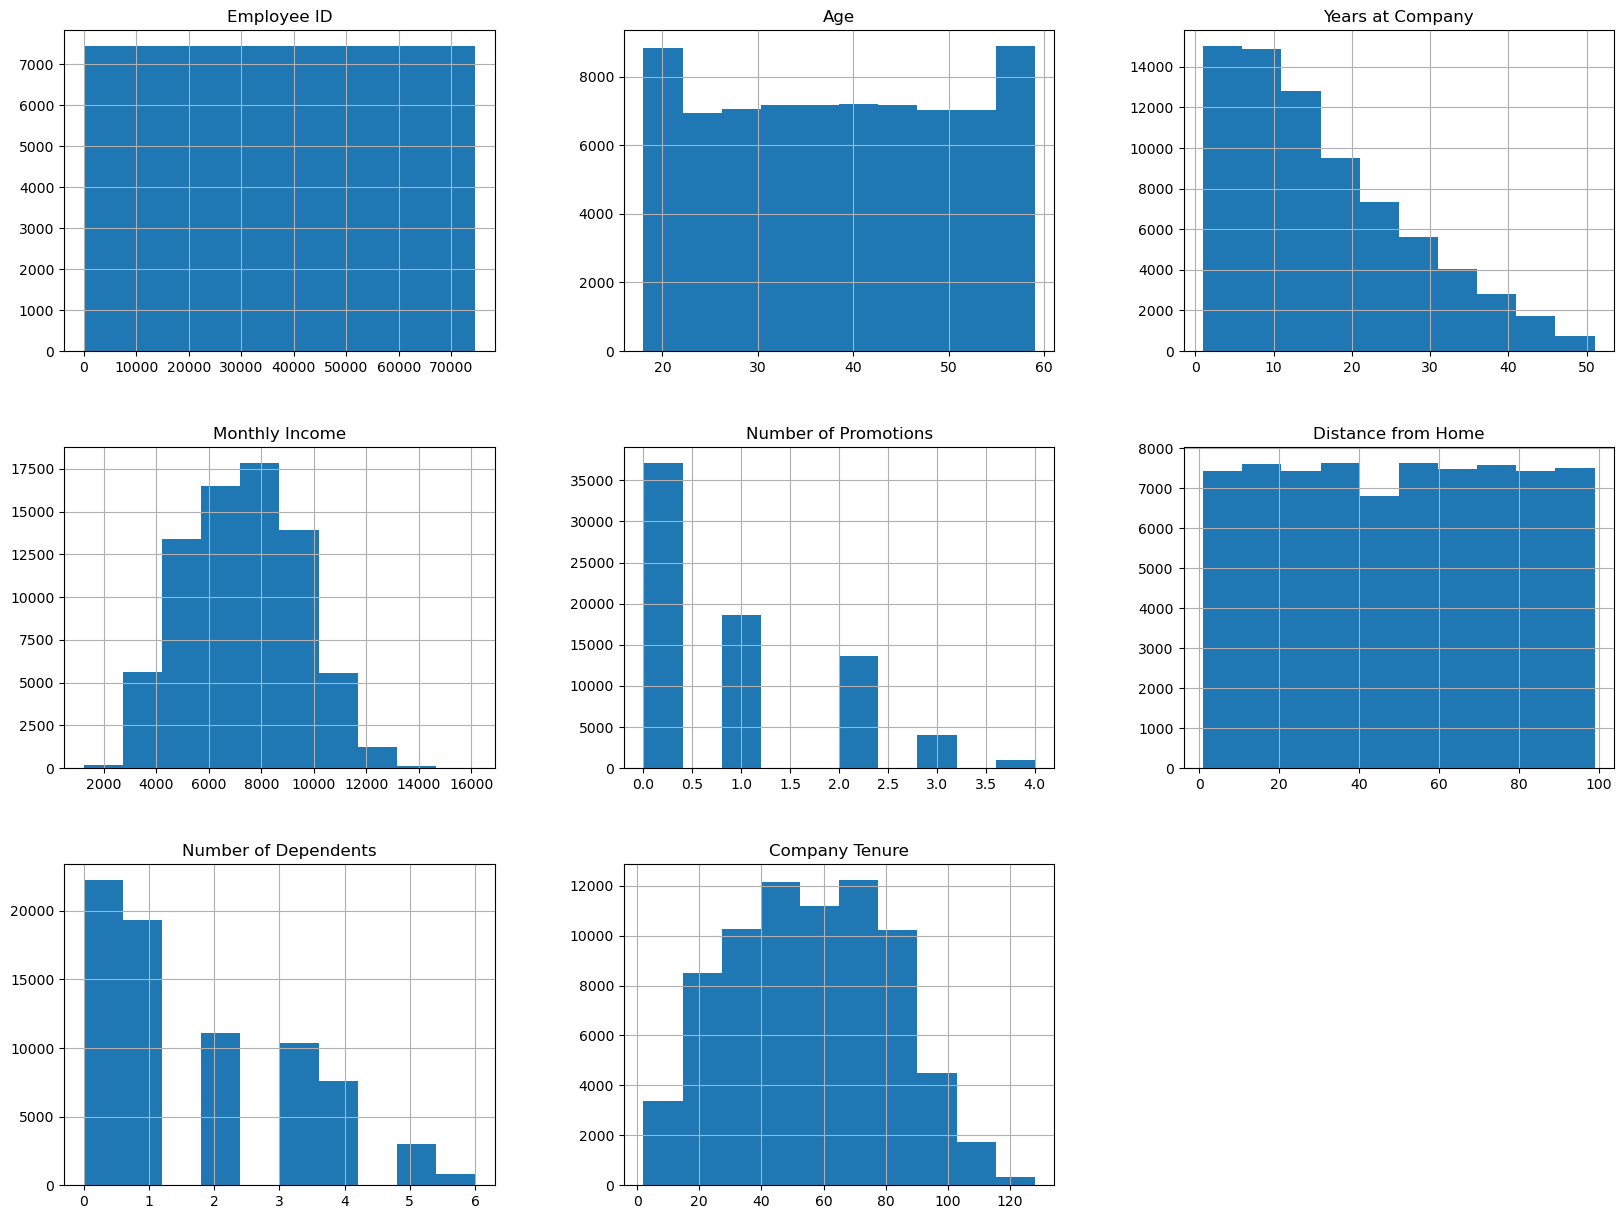

In [167]:
freqgraph=data.select_dtypes(include=["float64","int64"])  # to find the frequency of the data
freqgraph.hist(figsize=(20,15));  

In [168]:
data["Number of Promotions"]=data["Number of Promotions"].fillna(data["Number of Promotions"].median())
data["Number of Dependents"]=data["Number of Dependents"].fillna(data["Number of Dependents"].median())
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        0
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

In [169]:
data["Work-Life Balance"]=data["Work-Life Balance"].fillna(data["Work-Life Balance"].mode())
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        0
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

**Label Encoding**

In [170]:
from sklearn.preprocessing import LabelEncoder

In [171]:
le=LabelEncoder()  #instance for the class labelencoder

In [172]:
data['Work-Life Balance']=le.fit_transform(data['Work-Life Balance'])
data['Performance Rating']=le.fit_transform(data['Performance Rating'])
data['Education Level']=le.fit_transform(data['Education Level'])
data['Performance Rating']=le.fit_transform(data['Performance Rating'])
data['Marital Status']=le.fit_transform(data['Marital Status'])
data['Job Level']=le.fit_transform(data['Job Level'])
data['Company Size']=le.fit_transform(data['Company Size'])
data['Remote Work']=le.fit_transform(data['Remote Work'])
data['Gender']=le.fit_transform(data['Gender'])
data['Job Role']=le.fit_transform(data['Job Role'])
data['Job Satisfaction']=le.fit_transform(data['Job Satisfaction'])
data['Overtime']=le.fit_transform(data['Overtime'])
data['Employee Recognition']=le.fit_transform(data['Employee Recognition'])
data['Leadership Opportunities']=le.fit_transform(data['Leadership Opportunities'])
data['Innovation Opportunities']=le.fit_transform(data['Innovation Opportunities'])
data['Company Reputation']=le.fit_transform(data['Company Reputation'])
data['Attrition']=le.fit_transform(data['Attrition'])

data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,0,5390,0,2,0,2.0,...,0.0,1,1,89,0,0,0,0,2,1
1,64756,59,0,4,3,5534,3,0,3,3.0,...,3.0,1,1,21,0,0,0,1,1,1
2,30257,24,0,10,2,8159,2,0,3,0.0,...,3.0,1,1,74,0,0,0,3,1,1
3,65791,36,0,7,0,3989,2,0,2,1.0,...,2.0,1,2,50,1,0,0,2,2,1
4,65026,56,1,41,0,4821,1,3,0,0.0,...,0.0,2,1,68,0,0,0,1,2,1


In [173]:
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [174]:
data=data.drop(['Employee ID'],axis=1)

In [175]:
data

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,1,19,0,5390,0,2,0,2.0,0,...,0.0,1,1,89,0,0,0,0,2,1
1,59,0,4,3,5534,3,0,3,3.0,0,...,3.0,1,1,21,0,0,0,1,1,1
2,24,0,10,2,8159,2,0,3,0.0,0,...,3.0,1,1,74,0,0,0,3,1,1
3,36,0,7,0,3989,2,0,2,1.0,0,...,2.0,1,2,50,1,0,0,2,2,1
4,56,1,41,0,4821,1,3,0,0.0,1,...,0.0,2,1,68,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,56,0,42,2,7830,3,2,0,0.0,1,...,0.0,2,1,60,0,0,0,3,2,1
74494,30,0,15,0,3856,2,2,0,2.0,1,...,0.0,0,1,20,0,0,0,2,2,0
74495,52,1,5,0,5654,2,3,1,0.0,0,...,4.0,1,2,7,0,0,0,2,0,0
74496,18,1,4,0,5276,1,0,0,0.0,0,...,3.0,1,0,5,0,0,0,3,0,1


C:\Users\Anna Sani\AppData\Local\Temp\ipykernel_17900\859321179.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


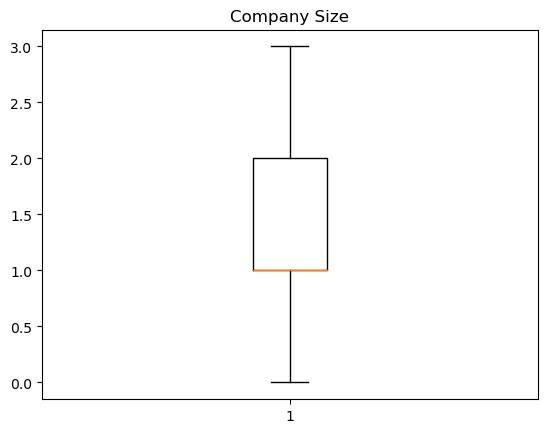

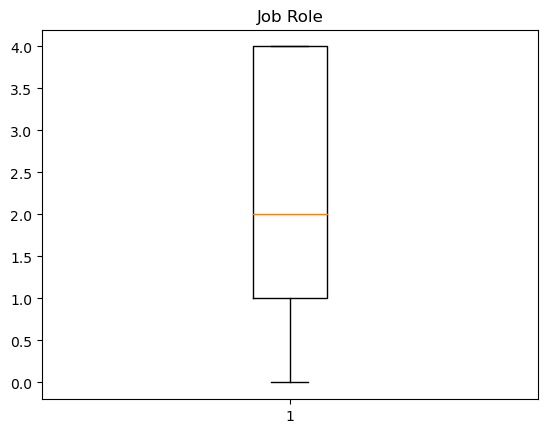

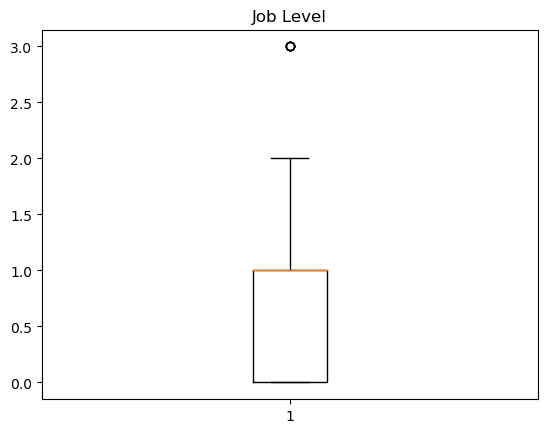

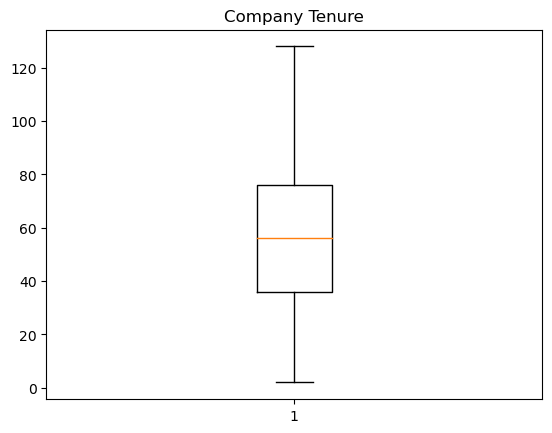

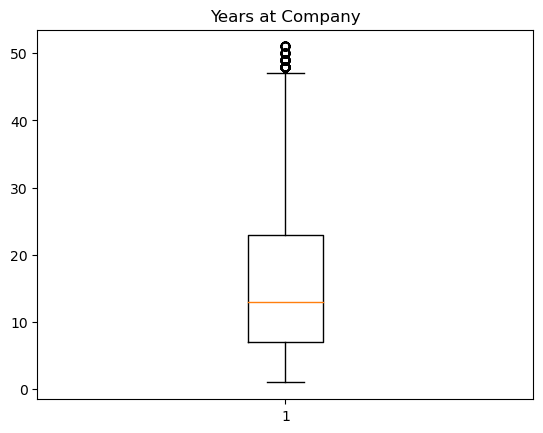

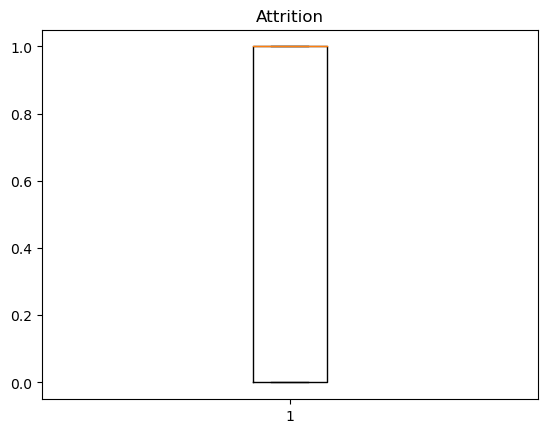

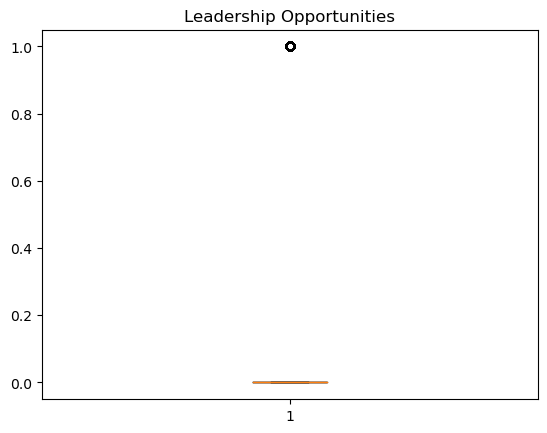

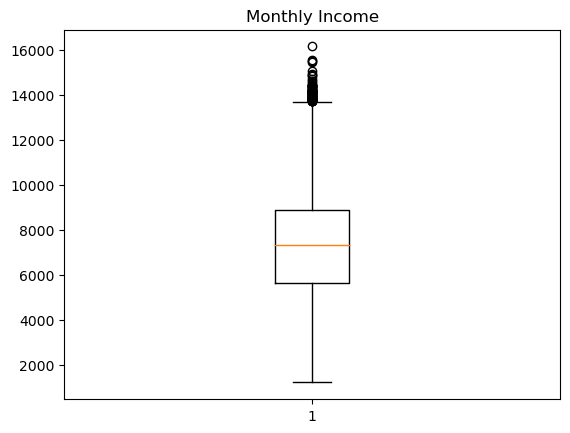

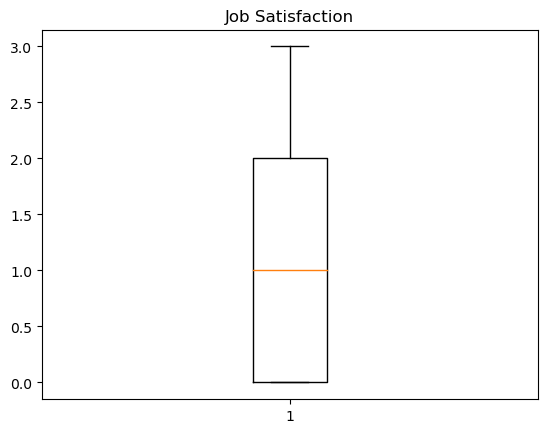

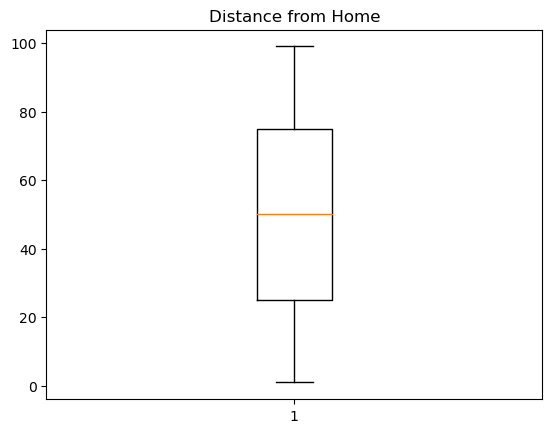

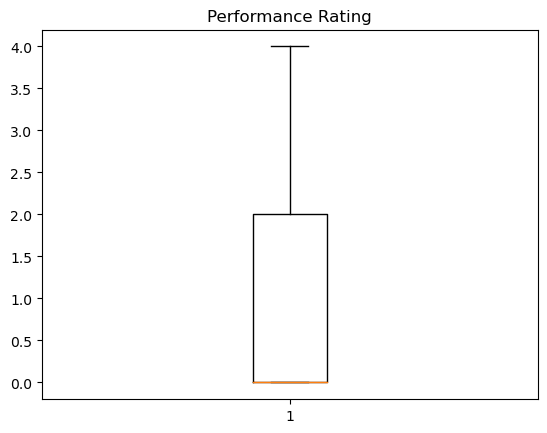

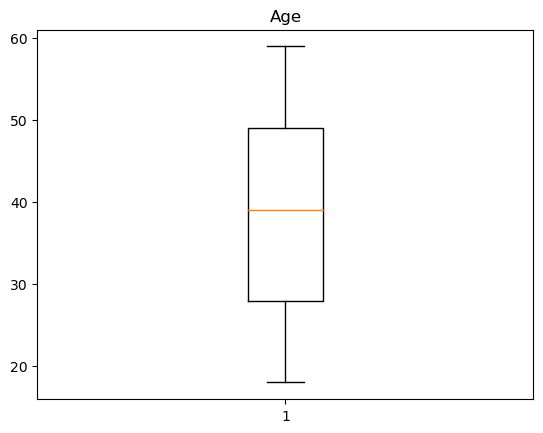

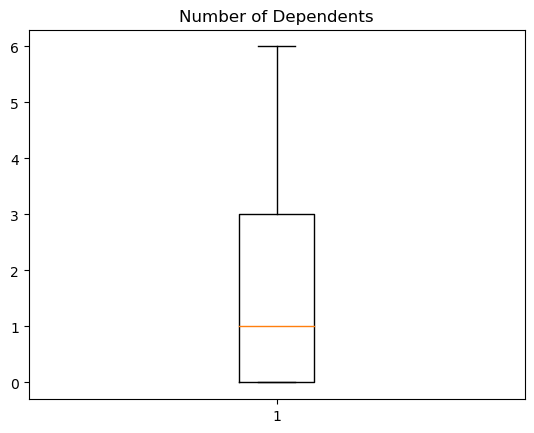

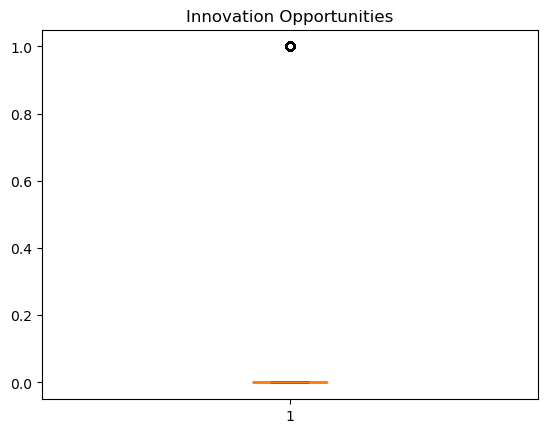

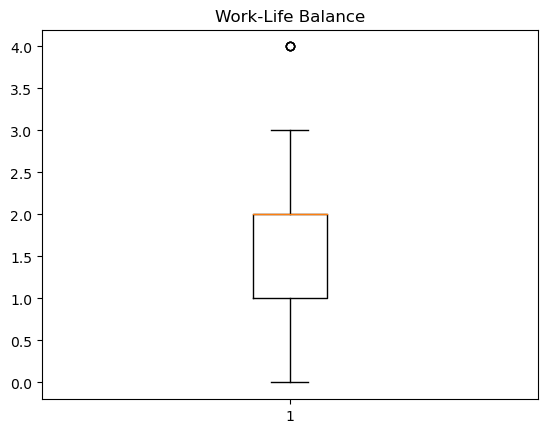

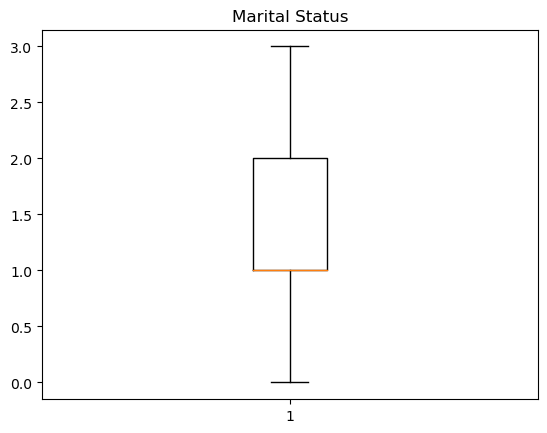

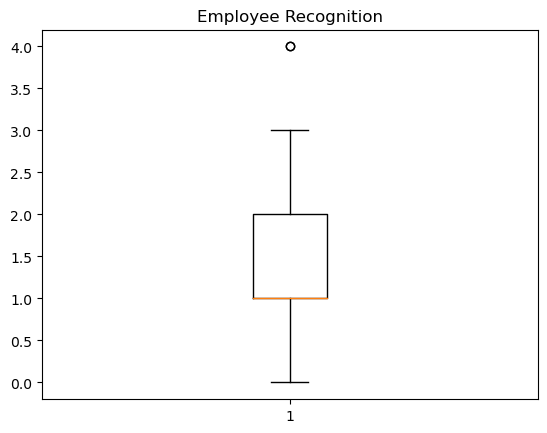

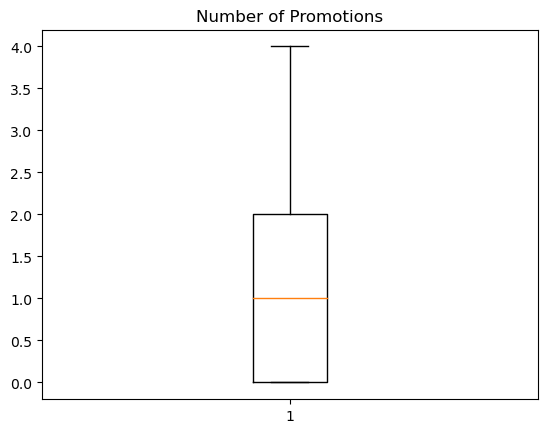

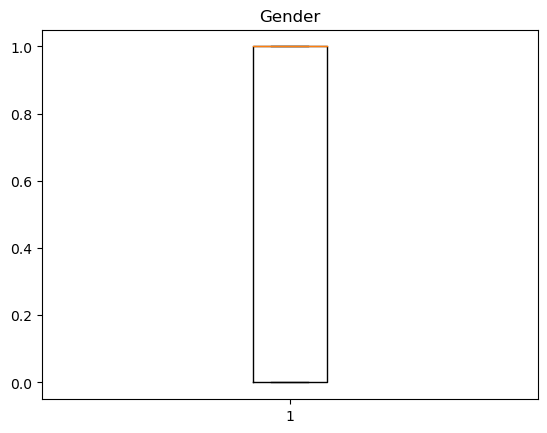

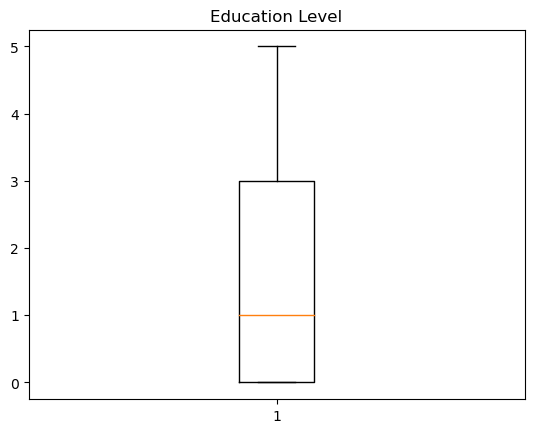

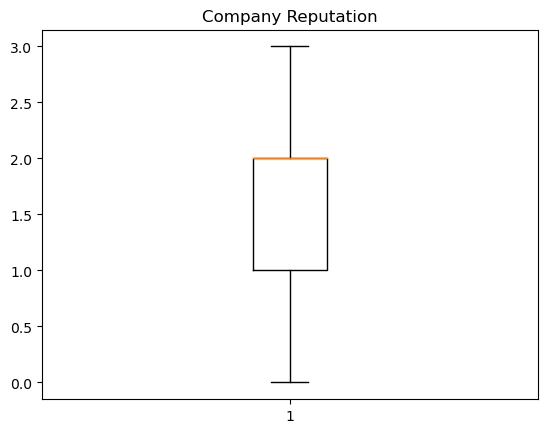

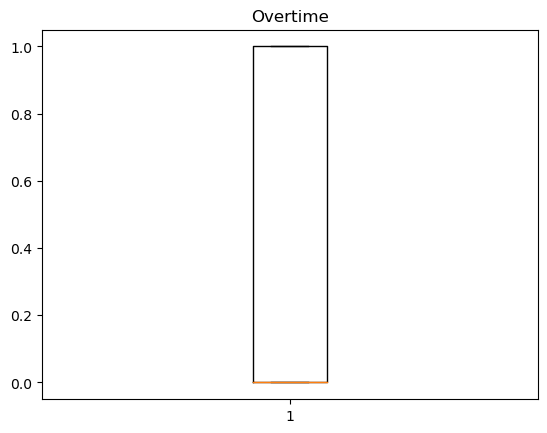

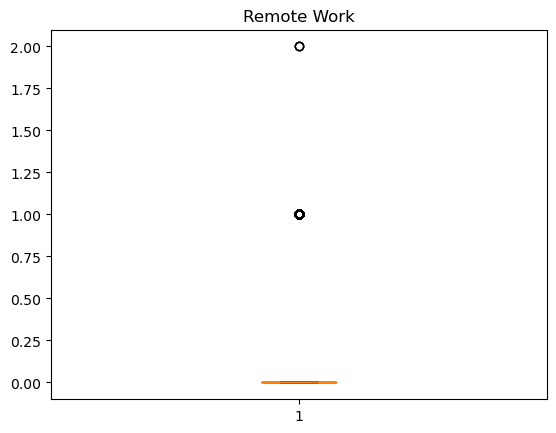

In [176]:
#ouliers
new_col={"Age",'Gender','Years at Company', 'Job Role', 'Monthly Income', 'Work-Life Balance', 'Job Satisfaction','Performance Rating','Number of Promotions','Overtime','Distance from Home','Education Level','Marital Status','Number of Dependents','Job Level','Company Size','Company Tenure','Remote Work','Leadership Opportunities','Innovation Opportunities','Company Reputation','Employee Recognition',
'Attrition'}
for i in new_col:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [177]:
q1=np.percentile(data['Years at Company'],25,method='midpoint')
q2=np.percentile(data['Years at Company'],50,method='midpoint')
q3=np.percentile(data['Years at Company'],75,method='midpoint')

In [178]:
print("q1 is : " ,q1)
print("q2 is : ",q2)
print("q3 is : " ,q3)

q1 is :  7.0
q2 is :  13.0
q3 is :  23.0


In [179]:
IQR=q3-q1
print(IQR)

16.0


In [180]:
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR


In [181]:
print("lower value: ",low_lim)
print("upper value:",up_lim)
 

lower value:  -17.0
upper value: 47.0


In [182]:
outliers=[]
for x in data['Years at Company']:
  if(x<low_lim)or(x>up_lim):
    outliers.append(x)
print(outliers)

[48, 49, 49, 48, 48, 49, 50, 48, 50, 48, 48, 49, 48, 51, 48, 48, 51, 48, 48, 48, 48, 49, 49, 50, 51, 48, 48, 50, 48, 49, 48, 49, 48, 48, 49, 50, 48, 48, 48, 49, 49, 49, 48, 49, 50, 51, 49, 48, 51, 49, 49, 48, 50, 50, 49, 49, 49, 50, 48, 48, 48, 48, 48, 49, 48, 51, 48, 49, 50, 49, 48, 48, 48, 49, 51, 48, 50, 50, 50, 50, 50, 48, 49, 48, 49, 49, 50, 49, 51, 48, 50, 49, 48, 48, 50, 48, 49, 48, 48, 48, 48, 50, 51, 49, 49, 49, 48, 51, 48, 49, 49, 50, 50, 48, 51, 49, 49, 48, 48, 48, 48, 49, 50, 49, 48, 49, 50, 48, 48, 49, 48, 49, 48, 48, 51, 49, 50, 48, 48, 48, 50, 48, 51, 50, 48, 49, 49, 49, 51, 49, 48, 49, 51, 48, 50, 50, 49, 48, 48, 48, 49, 48, 48, 51, 48, 49, 48, 48, 48, 49, 48, 51, 49, 49, 48, 48, 50, 48, 48, 49, 48, 48, 49, 49, 50, 50, 49, 48, 49, 48, 48, 48, 50, 51, 50, 49, 48, 50, 50, 48, 48, 50, 49, 49, 48, 49, 48, 48, 48, 49, 49, 48, 48, 49, 49, 49, 51, 48, 51, 48, 49, 49, 48, 50, 50, 51, 49, 49, 48, 48, 51, 49, 48, 49, 48, 51, 49, 48, 49, 49, 49, 50, 49, 49, 50, 51, 49, 50, 49, 49,

In [183]:
data['Years at Company']=data['Years at Company'].clip(lower=low_lim,upper=up_lim)

In [184]:
outliers=[]
for x in data['Years at Company']:
  if(x<low_lim)or(x>up_lim):
    outliers.append(x)
print(outliers)

[]


In [185]:
q1=np.percentile(data['Monthly Income'],25,method='midpoint')
q2=np.percentile(data['Monthly Income'],50,method='midpoint')
q3=np.percentile(data['Monthly Income'],75,method='midpoint')

In [186]:
print("q1 is : " ,q1)
print("q2 is : ",q2)
print("q3 is : " ,q3)

q1 is :  5652.0
q2 is :  7348.0
q3 is :  8876.0


In [187]:
IQR=q3-q1
print(IQR)

3224.0


In [188]:
print("lower value: ",low_lim)
print("upper value:",up_lim)

lower value:  -17.0
upper value: 47.0


In [189]:
outliers=[]
for x in data['Monthly Income']:
  if(x<low_lim)or(x>up_lim):
    outliers.append(x)
print(outliers)

[5390, 5534, 8159, 3989, 4821, 9977, 3681, 11223, 3773, 7319, 5443, 8950, 9039, 8090, 6350, 5176, 8242, 8733, 6252, 7538, 8733, 8201, 8079, 5874, 4656, 4987, 12507, 7571, 3535, 8330, 6334, 8874, 7364, 5556, 9293, 7701, 5105, 8632, 5315, 5938, 6213, 5956, 6605, 8274, 9878, 8442, 6690, 8397, 9775, 5586, 9355, 7976, 6356, 5967, 10111, 8673, 5040, 9894, 6785, 7368, 5154, 8407, 4195, 4451, 10122, 7303, 7946, 6026, 10135, 8631, 4431, 3598, 7949, 7967, 8876, 6628, 8340, 10080, 8860, 5678, 8683, 4042, 9737, 5246, 10141, 9033, 5397, 6135, 7063, 6940, 4733, 7625, 6640, 7287, 6993, 12041, 6534, 7529, 4421, 9197, 8762, 8744, 7406, 6099, 9626, 10298, 8972, 9501, 4023, 8332, 4237, 6437, 6690, 7038, 9177, 8761, 5428, 7859, 10298, 7430, 4573, 9434, 4583, 7979, 10166, 5316, 10030, 8736, 6929, 10167, 9063, 8926, 3204, 9306, 4862, 7576, 11735, 6453, 7359, 7838, 10943, 10513, 6669, 8309, 6426, 8423, 8723, 9152, 8546, 5797, 3625, 8048, 4205, 4373, 6925, 8299, 11556, 5820, 7631, 5891, 8376, 6185, 6467, 6954

In [190]:
data['Monthly Income']=data['Monthly Income'].clip(lower=low_lim,upper=up_lim)

In [191]:
outliers=[]
for x in data['Monthly Income']:
  if(x<low_lim)or(x>up_lim):
    outliers.append(x)
print(outliers)

[]


In [192]:
data.describe()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,74498.000000,74498.000000,74498.000000,74498.000000,74498.0,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,...,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000
mean,38.529746,0.548015,15.712838,2.119144,47.0,1.476442,1.102419,0.700180,0.832989,0.326734,...,1.650313,0.802290,1.099949,55.727456,0.190663,0.049035,0.162474,1.805391,1.153749,0.525222
std,12.083456,0.497693,11.198333,1.471487,0.0,0.942849,1.223380,0.954565,0.995271,0.469022,...,1.553608,0.750182,0.700252,25.399349,0.392929,0.215942,0.368888,0.872694,0.852546,0.499367
min,18.000000,0.000000,1.000000,0.000000,47.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,7.000000,1.000000,47.0,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,36.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,39.000000,1.000000,13.000000,2.000000,47.0,2.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,56.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000
75%,49.000000,1.000000,23.000000,4.000000,47.0,2.000000,2.000000,2.000000,2.000000,1.000000,...,3.000000,1.000000,2.000000,76.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000
max,59.000000,1.000000,47.000000,4.000000,47.0,4.000000,3.000000,4.000000,4.000000,1.000000,...,6.000000,3.000000,3.000000,128.000000,2.000000,1.000000,1.000000,3.000000,4.000000,1.000000


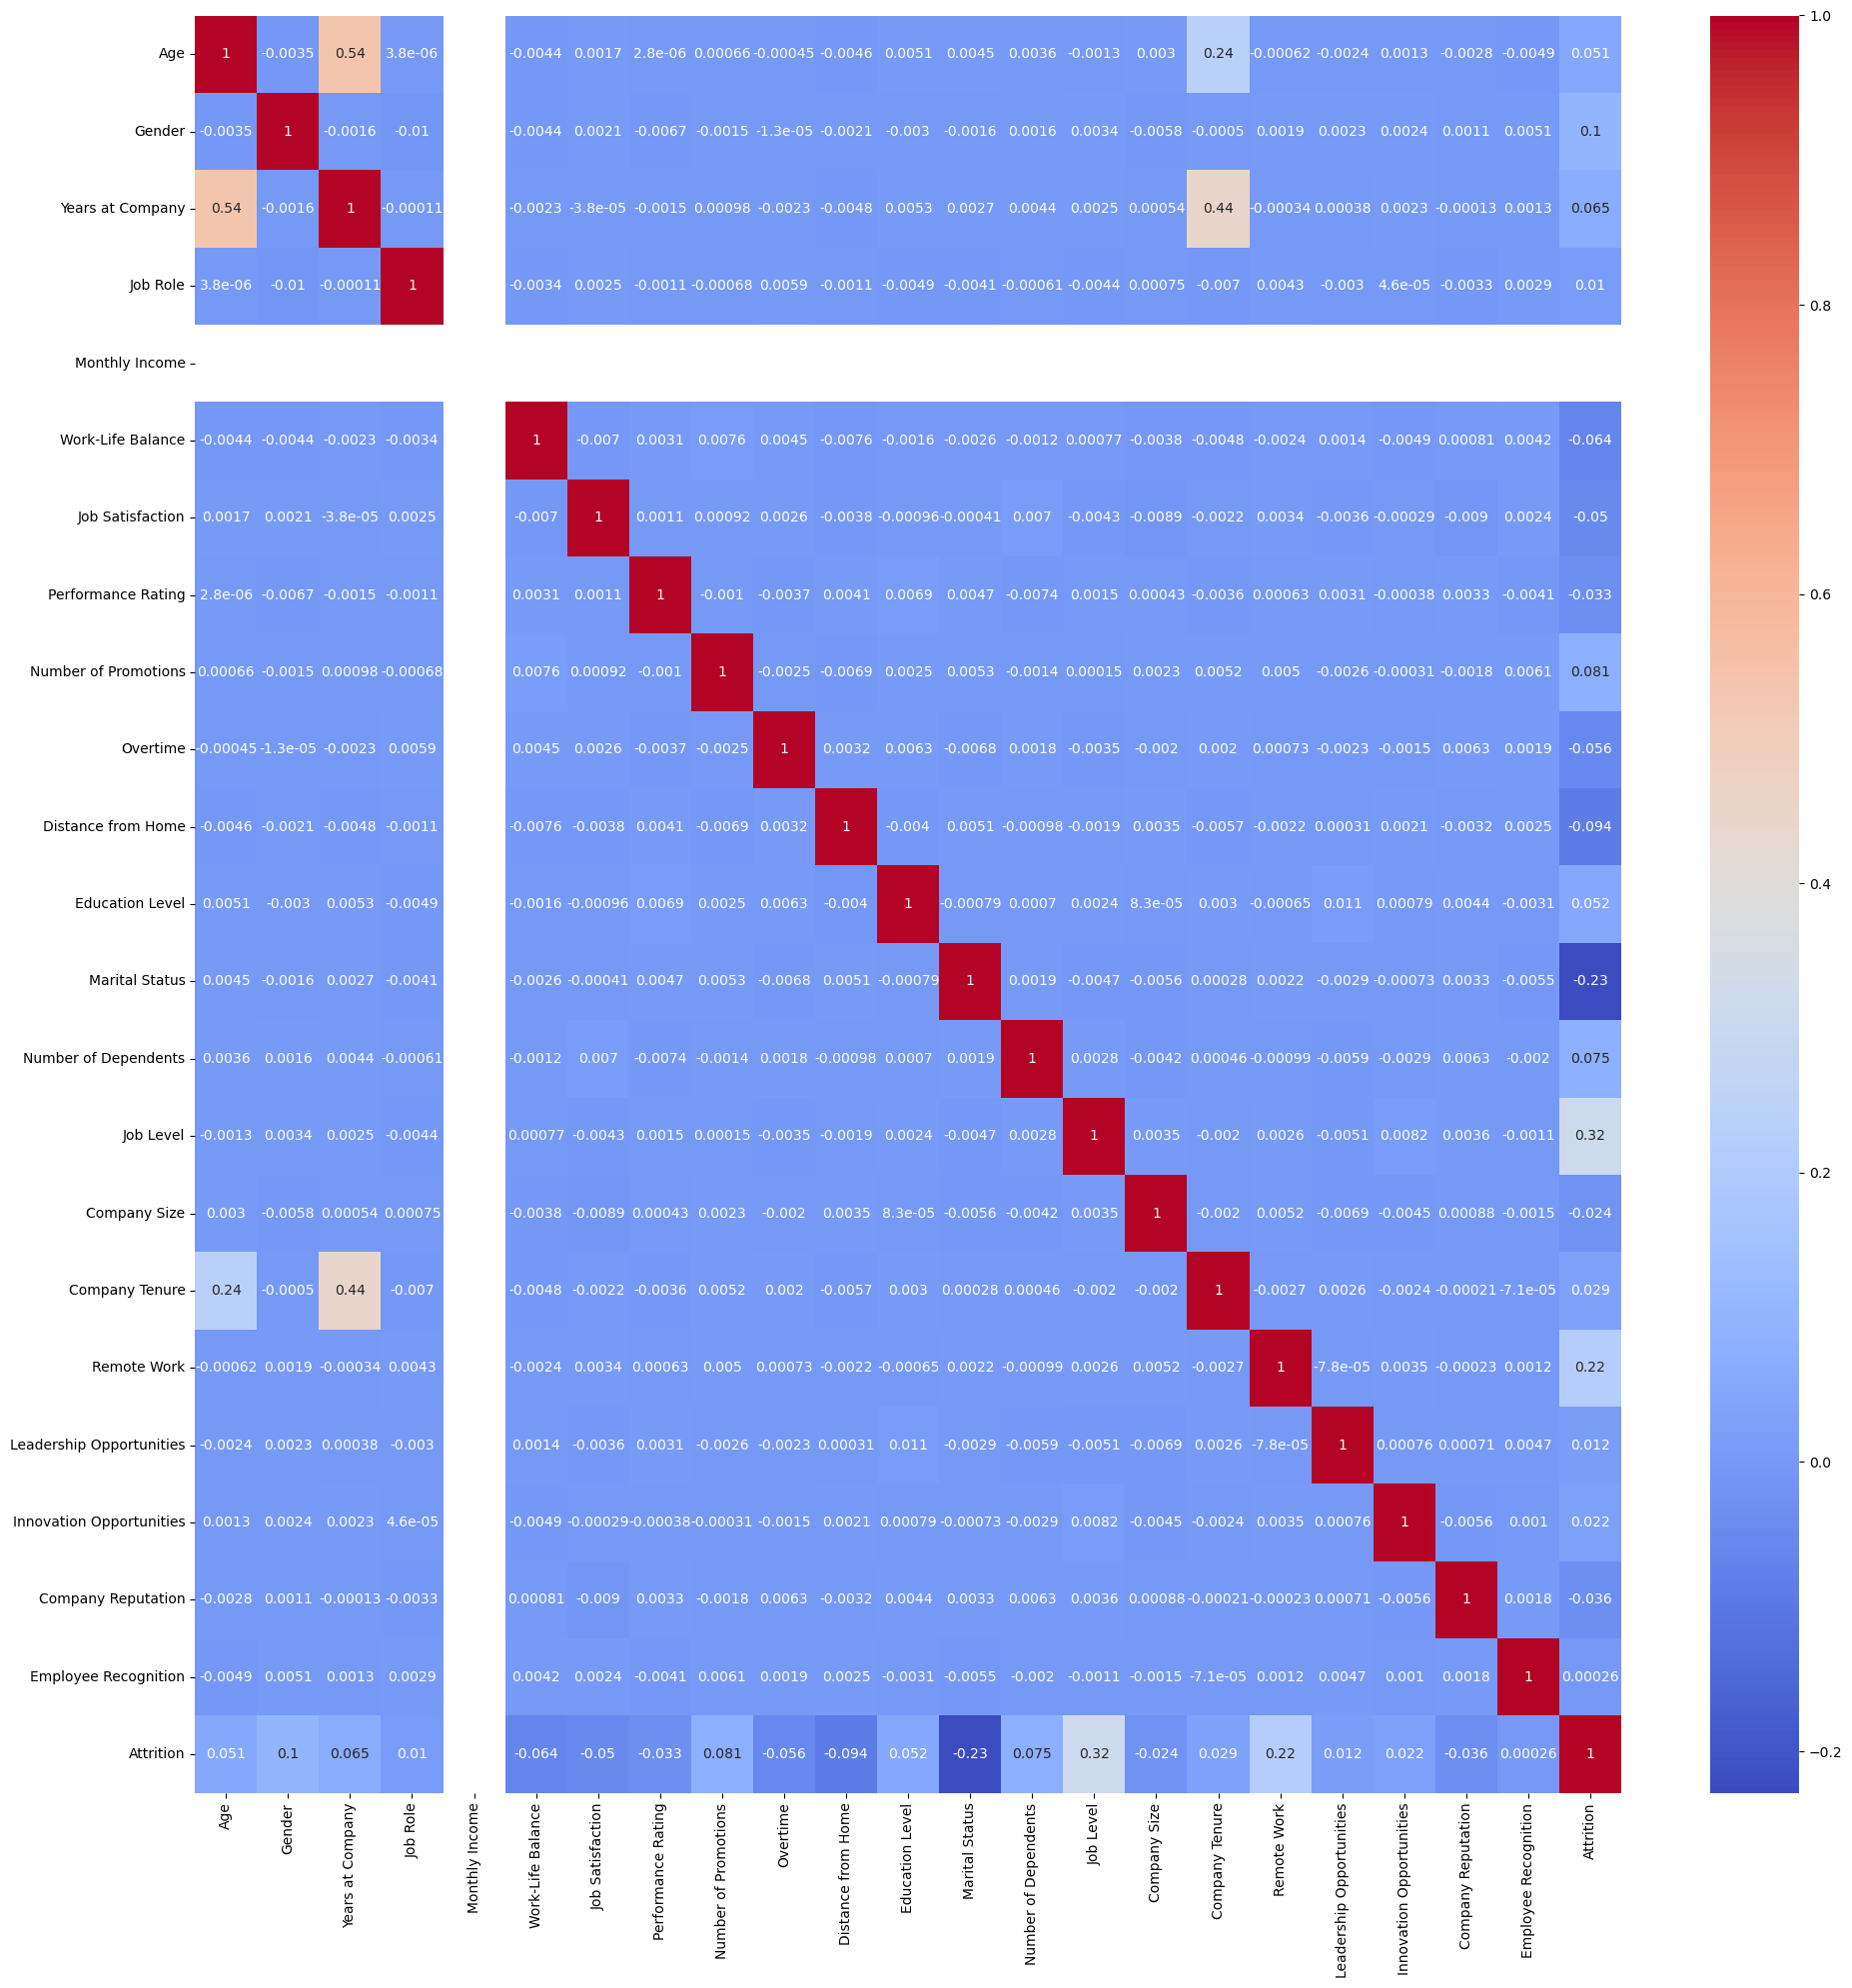

In [193]:
plt.figure(figsize=(20,20))
heatmap=sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.tight_layout()
plt.show()

**Classification >>LogisticRegression**

In [194]:
y=data['Attrition']
X=data.drop(['Attrition'],axis=1)

In [195]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [196]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [197]:
log_reg.fit(X_train,y_train)
log_pred=log_reg.predict(X_test)

C:\Users\Anna Sani\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [198]:
log_pred

array([1, 1, 1, ..., 1, 0, 1])

In [199]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [200]:
confusion_matrix(y_test, log_pred)


array([[6166, 2705],
       [2543, 7211]], dtype=int64)

In [201]:
print('Accuracy:', accuracy_score(y_test,log_pred))
print('Precision:', precision_score(y_test,log_pred))
print('recall:', recall_score(y_test,log_pred))
print('f1:', f1_score(y_test,log_pred))

Accuracy: 0.7182281879194631
Precision: 0.7272085518354175
recall: 0.7392864465860159
f1: 0.7331977630910016


**Scaling**

In [202]:
from sklearn.preprocessing import StandardScaler

In [203]:
sc=StandardScaler()
sc_Xtrain=sc.fit_transform(X_train)
sc_Xtest = sc.fit_transform(X_test)


In [204]:
log_reg.fit(sc_Xtrain,y_train)
log_pred=log_reg.predict(sc_Xtest)


In [205]:
confusion_matrix(y_test, log_pred)

array([[6189, 2682],
       [2559, 7195]], dtype=int64)

In [206]:
print('Accuracy:', accuracy_score(y_test,log_pred))
print('Precision:', precision_score(y_test,log_pred))
print('recall:', recall_score(y_test,log_pred))
print('f1:', f1_score(y_test,log_pred))

Accuracy: 0.7186040268456376
Precision: 0.7284600587222841
recall: 0.7376460939101906
f1: 0.7330242983037033


**Accuracy of the model is 0.71 which indicates that the model is performing well in correctly identifying Attrition.**

In [208]:
from sklearn.tree import DecisionTreeClassifier
df_clf=DecisionTreeClassifier()
df_clf.fit(X_train,y_train)
y_pred=df_clf.predict(X_test)

In [209]:
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Precision:', precision_score(y_test,y_pred))
print('recall:', recall_score(y_test,y_pred))
print('f1:', f1_score(y_test,y_pred))

Accuracy: 0.6626040268456376
Precision: 0.6785714285714286
recall: 0.6759278244822637
f1: 0.6772470467385723


In [210]:
confusion_matrix(y_test, y_pred)

array([[5748, 3123],
       [3161, 6593]], dtype=int64)

In [211]:
from sklearn.ensemble import RandomForestClassifier

In [212]:
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [213]:
y_pred=rf_clf.predict(X_test)

In [214]:
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Precision:', precision_score(y_test,y_pred))
print('recall:', recall_score(y_test,y_pred))
print('f1:', f1_score(y_test,y_pred))

Accuracy: 0.7500671140939598
Precision: 0.7599143643592619
recall: 0.7641993028501127
f1: 0.7620508102029341


In [215]:
confusion_matrix(y_test, y_pred)

array([[6516, 2355],
       [2300, 7454]], dtype=int64)

**Random forest model is good 0.75**